In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import matplotlib as mpl
import joblib
import keras
import tensorflow as tf
import pandas as pd
import numpy as np
# tensorflow 용 시간체크와 tqdm
!pip install tensorflow-addons
import tqdm
import tensorflow_addons as tfa
tqdm_callback = tfa.callbacks.TQDMProgressBar()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 17.5 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


#### navie forecast Base 모델부터 시작

In [2]:
# sin 함수로 예측
def generate_time_series(batch_size, n_steps):
  freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
  time = np.linspace(0, 1, n_steps)
  series = 0.5 * np.sin((time-offsets1)*(freq1 * 10 + 10))
  series += 0.2 * np.sin((time-offsets2)*(freq2 * 30 + 30))
  series += 0.1 * (np.random.rand(batch_size, n_steps)-0.5)
  return series[..., np.newaxis].astype(np.float32)

In [3]:
n_steps= 50
series = generate_time_series(10000, n_steps+1)

In [4]:
# 훈련셋 분리
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [68]:
X_train.shape, y_train.shape

((7000, 50, 1), (7000, 1))

In [28]:
# 그래프 정의
def plot_series(series, y=None, y_pred=None, x_label="$s$", y_label="$x(t)$", legend=True):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bo", label="Target")
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "rx", markersize=10, label="Prediction")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])
    if legend and (y or y_pred):
        plt.legend(fontsize=14, loc="upper left")

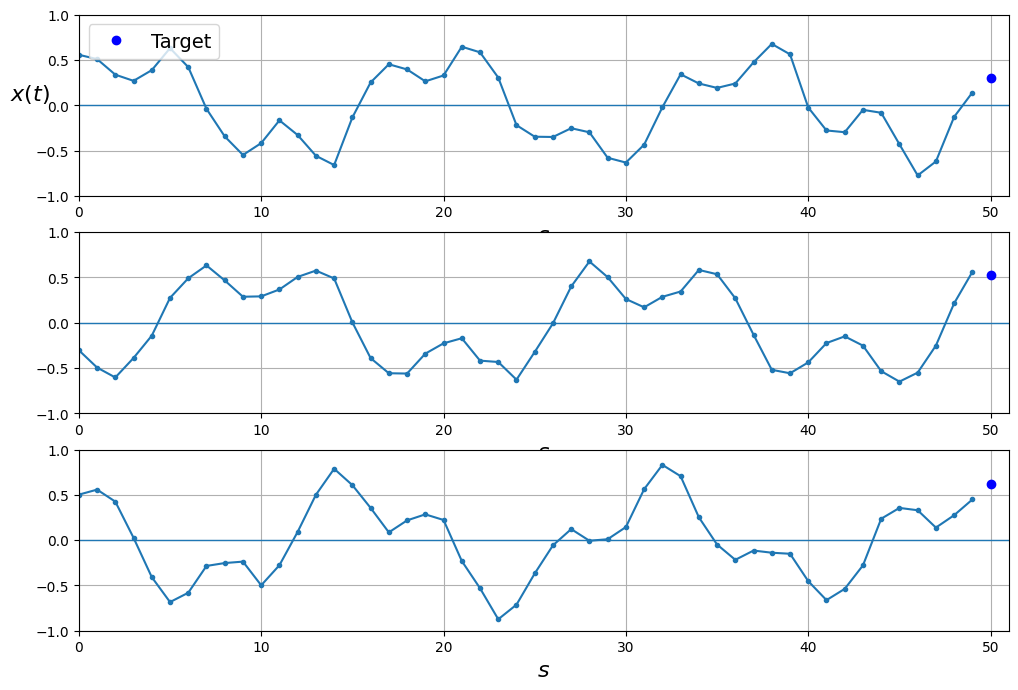

In [29]:
# 시각화
fig, axes = plt.subplots(nrows=3, ncols=1, sharey=True, figsize=(12, 8))
for col in range(3):
    plt.sca(axes[col])
    plot_series(X_valid[col, :, 0], y_valid[col, 0],
                y_label=("$x(t)$" if col==0 else None),
                legend=(col == 0))
plt.show()

#### 기준성능 계산

In [69]:
y_pred = X_valid[:, -1]
np.mean(keras.losses.mean_squared_error(y_valid, y_pred))
# 마지막값으로 예측

0.05318755

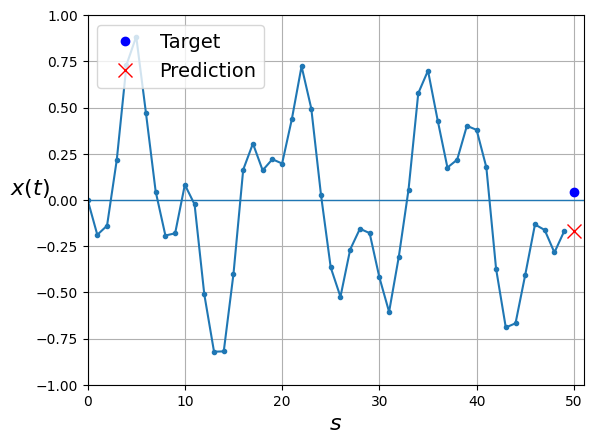

In [70]:
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0,0])
plt.show()

In [71]:
# 모델 로드

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50, 1]),
    keras.layers.Dense(1)
])
# 컴파일
model.compile(loss="mse", optimizer="adam")

In [72]:
# 학습 25회부터 시작
history = model.fit(X_train, y_train, epochs = 25, validation_data=
                    (X_valid, y_valid), callbacks=tqdm_callback)

Training:   0%|           0/25 ETA: ?s,  ?epochs/s

Epoch 1/25


0/219           ETA: ?s - 

Epoch 1/25
219/219 [==============================] - 3s 6ms/step - loss: 0.2795 - val_loss: 0.1310
Epoch 2/25


0/219           ETA: ?s - 

Epoch 2/25
219/219 [==============================] - 1s 3ms/step - loss: 0.0892 - val_loss: 0.0663
Epoch 3/25


0/219           ETA: ?s - 

Epoch 3/25
219/219 [==============================] - 1s 3ms/step - loss: 0.0487 - val_loss: 0.0421
Epoch 4/25


0/219           ETA: ?s - 

Epoch 4/25
219/219 [==============================] - 1s 3ms/step - loss: 0.0337 - val_loss: 0.0324
Epoch 5/25


0/219           ETA: ?s - 

Epoch 5/25
219/219 [==============================] - 1s 3ms/step - loss: 0.0276 - val_loss: 0.0277
Epoch 6/25


0/219           ETA: ?s - 

Epoch 6/25
219/219 [==============================] - 1s 3ms/step - loss: 0.0245 - val_loss: 0.0251
Epoch 7/25


0/219           ETA: ?s - 

Epoch 7/25
219/219 [==============================] - 1s 3ms/step - loss: 0.0226 - val_loss: 0.0234
Epoch 8/25


0/219           ETA: ?s - 

Epoch 8/25
219/219 [==============================] - 1s 3ms/step - loss: 0.0211 - val_loss: 0.0219
Epoch 9/25


0/219           ETA: ?s - 

Epoch 9/25
219/219 [==============================] - 1s 3ms/step - loss: 0.0199 - val_loss: 0.0207
Epoch 10/25


0/219           ETA: ?s - 

Epoch 10/25
219/219 [==============================] - 1s 3ms/step - loss: 0.0190 - val_loss: 0.0196
Epoch 11/25


0/219           ETA: ?s - 

Epoch 11/25
219/219 [==============================] - 1s 3ms/step - loss: 0.0181 - val_loss: 0.0186
Epoch 12/25


0/219           ETA: ?s - 

Epoch 12/25
219/219 [==============================] - 1s 3ms/step - loss: 0.0174 - val_loss: 0.0180
Epoch 13/25


0/219           ETA: ?s - 

Epoch 13/25
219/219 [==============================] - 1s 3ms/step - loss: 0.0168 - val_loss: 0.0174
Epoch 14/25


0/219           ETA: ?s - 

Epoch 14/25
219/219 [==============================] - 1s 3ms/step - loss: 0.0164 - val_loss: 0.0168
Epoch 15/25


0/219           ETA: ?s - 

Epoch 15/25
219/219 [==============================] - 1s 4ms/step - loss: 0.0159 - val_loss: 0.0164
Epoch 16/25


0/219           ETA: ?s - 

Epoch 16/25
219/219 [==============================] - 1s 4ms/step - loss: 0.0154 - val_loss: 0.0159
Epoch 17/25


0/219           ETA: ?s - 

Epoch 17/25
219/219 [==============================] - 1s 4ms/step - loss: 0.0151 - val_loss: 0.0156
Epoch 18/25


0/219           ETA: ?s - 

Epoch 18/25
219/219 [==============================] - 1s 3ms/step - loss: 0.0148 - val_loss: 0.0152
Epoch 19/25


0/219           ETA: ?s - 

Epoch 19/25
219/219 [==============================] - 1s 3ms/step - loss: 0.0146 - val_loss: 0.0149
Epoch 20/25


0/219           ETA: ?s - 

Epoch 20/25
219/219 [==============================] - 1s 3ms/step - loss: 0.0144 - val_loss: 0.0147
Epoch 21/25


0/219           ETA: ?s - 

Epoch 21/25
219/219 [==============================] - 1s 3ms/step - loss: 0.0142 - val_loss: 0.0145
Epoch 22/25


0/219           ETA: ?s - 

Epoch 22/25
219/219 [==============================] - 1s 3ms/step - loss: 0.0140 - val_loss: 0.0143
Epoch 23/25


0/219           ETA: ?s - 

Epoch 23/25
219/219 [==============================] - 1s 3ms/step - loss: 0.0138 - val_loss: 0.0142
Epoch 24/25


0/219           ETA: ?s - 

Epoch 24/25
219/219 [==============================] - 1s 3ms/step - loss: 0.0138 - val_loss: 0.0142
Epoch 25/25


0/219           ETA: ?s - 

Epoch 25/25
219/219 [==============================] - 1s 3ms/step - loss: 0.0137 - val_loss: 0.0139


In [73]:
# 평가 점수
model.evaluate(X_valid, y_valid)

63/63 [==============================] - 0s 2ms/step - loss: 0.0139


0.013908959925174713

In [5]:
# loss 시각화
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 25, 0, 0.5])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.title("linear regression")
plt.show()

NameError: ignored

63/63 [==============================] - 0s 1ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

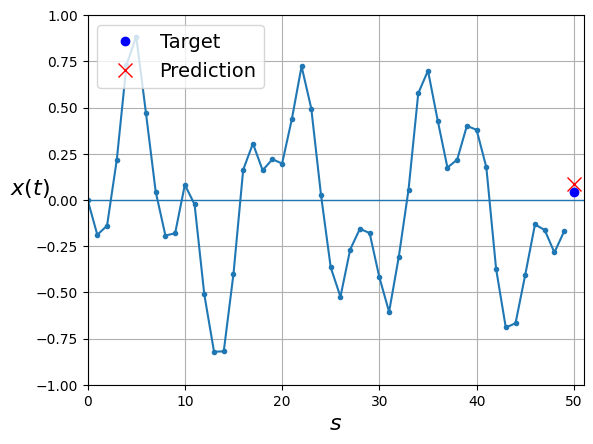

In [79]:
# 예측값에 대한 시각화
y_pred = model.predict(X_valid)
plot_series(X_valid[0,:,0], y_valid[0,0], y_pred[0,0])
plt.show

#### Base RNN 모델 제작

In [96]:
# 모델 로드

model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[None, 1]),
])
# 컴파일
optimizer = keras.optimizers.Nadam(learning_rate=0.001, decay=0.001)
model.compile(loss="mse", optimizer=optimizer)

In [ ]:
# 학습
history = model.fit(X_train, y_train, epochs=20,  validation_data=(X_valid, y_valid)
                    , callbacks = tqdm_callback)

In [98]:
# 평가 점수
model.evaluate(X_valid, y_valid)

63/63 [==============================] - 0s 6ms/step - loss: 0.0352


0.035167865455150604

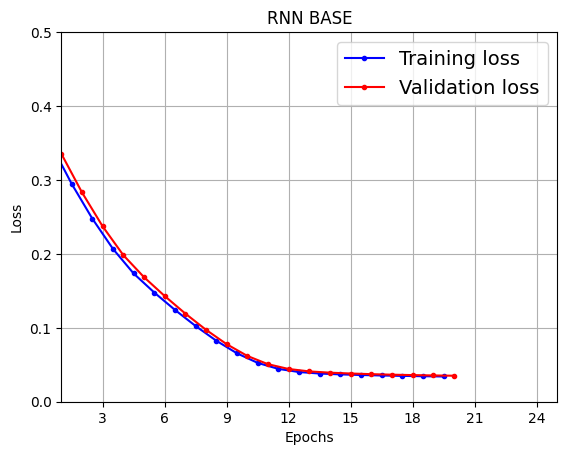

In [103]:
# loss 시각화
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.title("RNN BASE")
plt.show()

63/63 [==============================] - 1s 9ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

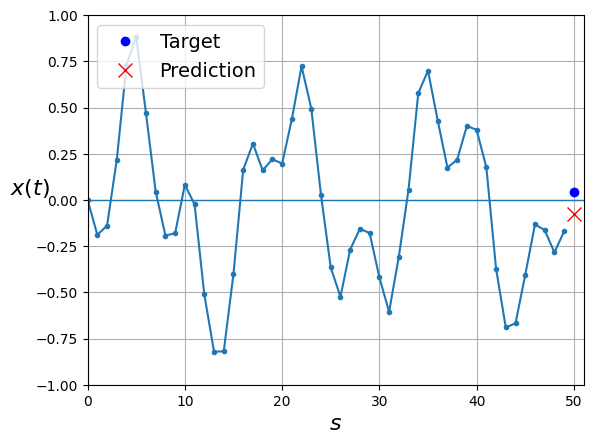

In [105]:
# 예측값에 대한 시각화
y_pred = model.predict(X_valid)
plot_series(X_valid[0,:,0], y_valid[0,0], y_pred[0,0])
plt.show

#### Deep RNN 진행

In [ ]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1)
])
# 인풋 20, 아웃풋 1 출력
model.summary()

In [109]:
# Deep RNN 컴파일
optimizer = keras.optimizers.Nadam(learning_rate=0.001, decay=0.001)
model.compile(loss="mse", optimizer=optimizer)

In [ ]:
# 학습 20회
# 학습
history = model.fit(X_train, y_train, epochs=20,  validation_data=(X_valid, y_valid)
                    , callbacks = tqdm_callback)

In [110]:
# 평가 점수
model.evaluate(X_valid, y_valid)

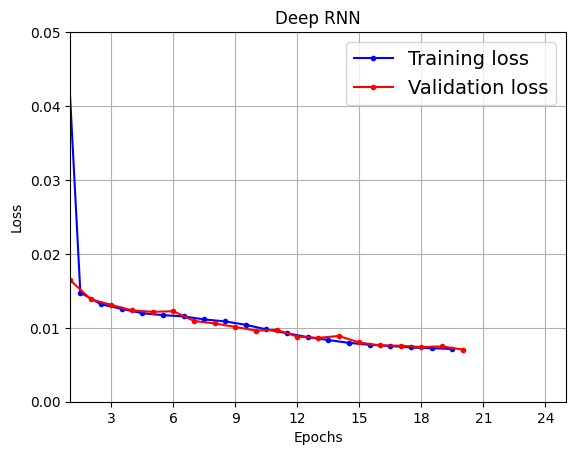

In [115]:
# loss 시각화
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 25, 0, 0.05])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.title("Deep RNN")
plt.show()

63/63 [==============================] - 2s 18ms/step


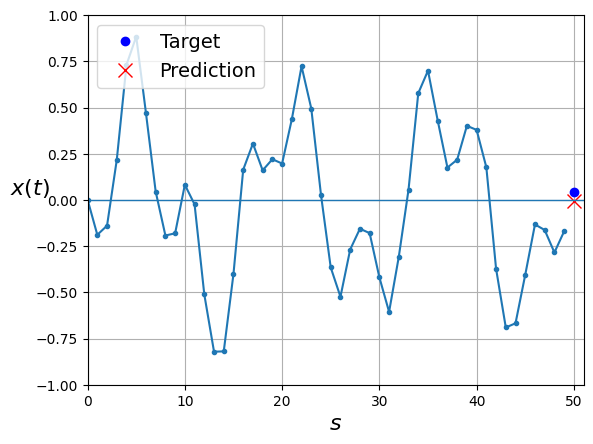

In [116]:
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

In [119]:
# 두번째 모델
tf.random.set_seed(1)
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(1)
])
# 인풋 20, 마지막 output만 반환
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_21 (SimpleRNN)   (None, None, 20)          440       
                                                                 
 simple_rnn_22 (SimpleRNN)   (None, 20)                820       
                                                                 
 dense_9 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________


In [120]:
# Deep RNN 2 컴파일
optimizer = keras.optimizers.Nadam(learning_rate=0.001, decay=0.001)
model.compile(loss="mse", optimizer=optimizer)

In [121]:
# 학습 20회
# 학습
history = model.fit(X_train, y_train, epochs=20,  validation_data=(X_valid, y_valid)
                    , callbacks = tqdm_callback)

Training:   0%|           0/20 ETA: ?s,  ?epochs/s

Epoch 1/20


0/219           ETA: ?s - 

Epoch 1/20
219/219 [==============================] - 26s 103ms/step - loss: 0.0388 - val_loss: 0.0155
Epoch 2/20


0/219           ETA: ?s - 

Epoch 2/20
219/219 [==============================] - 23s 107ms/step - loss: 0.0144 - val_loss: 0.0137
Epoch 3/20


0/219           ETA: ?s - 

Epoch 3/20
219/219 [==============================] - 23s 103ms/step - loss: 0.0128 - val_loss: 0.0121
Epoch 4/20


0/219           ETA: ?s - 

Epoch 4/20
219/219 [==============================] - 21s 98ms/step - loss: 0.0124 - val_loss: 0.0121
Epoch 5/20


0/219           ETA: ?s - 

Epoch 5/20
219/219 [==============================] - 21s 97ms/step - loss: 0.0119 - val_loss: 0.0111
Epoch 6/20


0/219           ETA: ?s - 

Epoch 6/20
219/219 [==============================] - 23s 106ms/step - loss: 0.0116 - val_loss: 0.0110
Epoch 7/20


0/219           ETA: ?s - 

Epoch 7/20
219/219 [==============================] - 22s 101ms/step - loss: 0.0112 - val_loss: 0.0107
Epoch 8/20


0/219           ETA: ?s - 

Epoch 8/20
219/219 [==============================] - 21s 95ms/step - loss: 0.0110 - val_loss: 0.0110
Epoch 9/20


0/219           ETA: ?s - 

Epoch 9/20
219/219 [==============================] - 22s 99ms/step - loss: 0.0106 - val_loss: 0.0102
Epoch 10/20


0/219           ETA: ?s - 

Epoch 10/20
219/219 [==============================] - 22s 100ms/step - loss: 0.0102 - val_loss: 0.0092
Epoch 11/20


0/219           ETA: ?s - 

Epoch 11/20
219/219 [==============================] - 22s 100ms/step - loss: 0.0098 - val_loss: 0.0092
Epoch 12/20


0/219           ETA: ?s - 

Epoch 12/20
219/219 [==============================] - 21s 96ms/step - loss: 0.0091 - val_loss: 0.0087
Epoch 13/20


0/219           ETA: ?s - 

Epoch 13/20
219/219 [==============================] - 22s 101ms/step - loss: 0.0087 - val_loss: 0.0083
Epoch 14/20


0/219           ETA: ?s - 

Epoch 14/20
219/219 [==============================] - 21s 98ms/step - loss: 0.0084 - val_loss: 0.0083
Epoch 15/20


0/219           ETA: ?s - 

Epoch 15/20
219/219 [==============================] - 21s 94ms/step - loss: 0.0080 - val_loss: 0.0081
Epoch 16/20


0/219           ETA: ?s - 

Epoch 16/20
219/219 [==============================] - 22s 99ms/step - loss: 0.0079 - val_loss: 0.0077
Epoch 17/20


0/219           ETA: ?s - 

Epoch 17/20
219/219 [==============================] - 22s 101ms/step - loss: 0.0077 - val_loss: 0.0074
Epoch 18/20


0/219           ETA: ?s - 

Epoch 18/20
219/219 [==============================] - 22s 101ms/step - loss: 0.0075 - val_loss: 0.0073
Epoch 19/20


0/219           ETA: ?s - 

Epoch 19/20
219/219 [==============================] - 28s 130ms/step - loss: 0.0074 - val_loss: 0.0077
Epoch 20/20


0/219           ETA: ?s - 

Epoch 20/20
219/219 [==============================] - 32s 145ms/step - loss: 0.0073 - val_loss: 0.0072


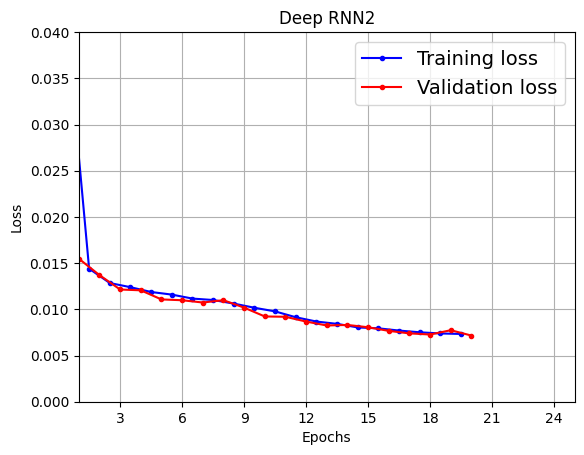

In [126]:
# loss 시각화
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 25, 0, 0.04])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.title("Deep RNN2")
plt.show()

In [123]:
# 다수 예측
series = generate_time_series(1, n_steps + 10)
X_new, Y_new = series[:, :n_steps], series[:, n_steps:]
X = X_new
for step_ahead in range(10):
  y_pred_one = model.predict(X[:, step_ahead:])[:, np.newaxis, :]
  X = np.concatenate([X, y_pred_one], axis = 1)

1/1 [==============================] - 0s 42ms/step


In [128]:
Y_pred=X[:, n_steps:]
Y_pred.shape

(1, 10, 1)

In [17]:
# multiple 예측 정의
def plot_multiple_forecasts(X, Y, Y_pred):
    n_steps = X.shape[1]
    ahead = Y.shape[1]
    plot_series(X[0, :, 0])
    plt.plot(np.arange(n_steps, n_steps + ahead), Y[0, :, 0], "bo-", label="Actual")
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_pred[0, :, 0], "rx-", label="Forecast", markersize=10)
    plt.axis([0, n_steps + ahead, -1, 1])
    plt.legend(fontsize=14)

plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.title("multiple forecast")
plt.show()

In [131]:
# 추가적으로 시퀸스 생성

n_steps = 50
series = generate_time_series(10000, n_steps + 10)
X_train, Y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
X_valid, Y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:, 0]
X_test, Y_test = series[9000:, :n_steps], series[9000:, -10:, 0]

In [132]:
X=X_valid
# 다수 예측
for step_ahead in range(10):
  y_pred_one = model.predict(X)[:, np.newaxis, :]
  x = np.concatenate([X, y_pred_one], axis = 1)
Y_pred = X[:, n_steps:, 0]
Y_pred.shape

63/63 [==============================] - 1s 9ms/step


(2000, 0)

In [137]:
# MSE
mse = np.mean(keras.metrics.mean_squared_error(Y_valid, Y_pred))

InvalidArgumentError: ignored

In [136]:
Y_naive_pred = np.tile(X_valid[:, -1], 10) # 마지막 타임 스텝 값을 선택해 10번 반복합니다
np.mean(keras.metrics.mean_squared_error(Y_valid, Y_naive_pred))

0.31305993

In [139]:
# 세번째 모델 - 선형회귀
tf.random.set_seed(1)
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50, 1]),
    keras.layers.Dense(10)
])
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 50)                0         
                                                                 
 dense_10 (Dense)            (None, 10)                510       
                                                                 
Total params: 510
Trainable params: 510
Non-trainable params: 0
_________________________________________________________________


In [140]:
# Deep RNN 2 컴파일
optimizer = keras.optimizers.Nadam(learning_rate=0.001, decay=0.001)
model.compile(loss="mse", optimizer=optimizer)

In [141]:
# 학습 20회
# 학습
history = model.fit(X_train, y_train, epochs=20,  validation_data=(X_valid, y_valid)
                    , callbacks = tqdm_callback)

Training:   0%|           0/20 ETA: ?s,  ?epochs/s

Epoch 1/20


0/219           ETA: ?s - 

Epoch 1/20
219/219 [==============================] - 2s 4ms/step - loss: 0.2560 - val_loss: 0.1981
Epoch 2/20


0/219           ETA: ?s - 

Epoch 2/20
219/219 [==============================] - 1s 3ms/step - loss: 0.1806 - val_loss: 0.1848
Epoch 3/20


0/219           ETA: ?s - 

Epoch 3/20
219/219 [==============================] - 1s 3ms/step - loss: 0.1745 - val_loss: 0.1833
Epoch 4/20


0/219           ETA: ?s - 

Epoch 4/20
219/219 [==============================] - 1s 4ms/step - loss: 0.1734 - val_loss: 0.1820
Epoch 5/20


0/219           ETA: ?s - 

Epoch 5/20
219/219 [==============================] - 1s 5ms/step - loss: 0.1728 - val_loss: 0.1827
Epoch 6/20


0/219           ETA: ?s - 

Epoch 6/20
219/219 [==============================] - 1s 5ms/step - loss: 0.1725 - val_loss: 0.1811
Epoch 7/20


0/219           ETA: ?s - 

Epoch 7/20
219/219 [==============================] - 1s 3ms/step - loss: 0.1722 - val_loss: 0.1807
Epoch 8/20


0/219           ETA: ?s - 

Epoch 8/20
219/219 [==============================] - 1s 6ms/step - loss: 0.1720 - val_loss: 0.1814
Epoch 9/20


0/219           ETA: ?s - 

Epoch 9/20
219/219 [==============================] - 1s 4ms/step - loss: 0.1717 - val_loss: 0.1824
Epoch 10/20


0/219           ETA: ?s - 

Epoch 10/20
219/219 [==============================] - 1s 4ms/step - loss: 0.1715 - val_loss: 0.1816
Epoch 11/20


0/219           ETA: ?s - 

Epoch 11/20
219/219 [==============================] - 1s 3ms/step - loss: 0.1714 - val_loss: 0.1804
Epoch 12/20


0/219           ETA: ?s - 

Epoch 12/20
219/219 [==============================] - 1s 4ms/step - loss: 0.1714 - val_loss: 0.1807
Epoch 13/20


0/219           ETA: ?s - 

Epoch 13/20
219/219 [==============================] - 1s 4ms/step - loss: 0.1709 - val_loss: 0.1813
Epoch 14/20


0/219           ETA: ?s - 

Epoch 14/20
219/219 [==============================] - 1s 3ms/step - loss: 0.1708 - val_loss: 0.1803
Epoch 15/20


0/219           ETA: ?s - 

Epoch 15/20
219/219 [==============================] - 1s 4ms/step - loss: 0.1709 - val_loss: 0.1802
Epoch 16/20


0/219           ETA: ?s - 

Epoch 16/20
219/219 [==============================] - 1s 3ms/step - loss: 0.1708 - val_loss: 0.1821
Epoch 17/20


0/219           ETA: ?s - 

Epoch 17/20
219/219 [==============================] - 1s 4ms/step - loss: 0.1707 - val_loss: 0.1791
Epoch 18/20


0/219           ETA: ?s - 

Epoch 18/20
219/219 [==============================] - 1s 5ms/step - loss: 0.1705 - val_loss: 0.1794
Epoch 19/20


0/219           ETA: ?s - 

Epoch 19/20
219/219 [==============================] - 1s 5ms/step - loss: 0.1701 - val_loss: 0.1798
Epoch 20/20


0/219           ETA: ?s - 

Epoch 20/20
219/219 [==============================] - 1s 5ms/step - loss: 0.1702 - val_loss: 0.1794


In [5]:
# loss 시각화
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 25, 0, 0.3])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.title("Linear base")
plt.show()

NameError: ignored

In [146]:
# 네번째 모델 - SimpleRNN Multi
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(10)
])

In [148]:
# SimpleRNN 3 컴파일
optimizer = keras.optimizers.Nadam(learning_rate=0.001, decay=0.001)
model.compile(loss="mse", optimizer=optimizer)

In [ ]:
# 학습 20회
# 학습
history = model.fit(X_train, y_train, epochs=20,  validation_data=(X_valid, y_valid)
                    , callbacks = tqdm_callback)

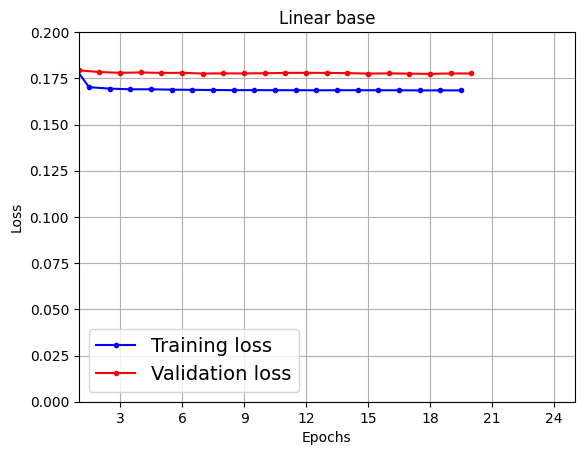

In [152]:
# loss 시각화
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 25, 0, 0.2])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.title("Linear base")
plt.show()

1/1 [==============================] - 0s 213ms/step


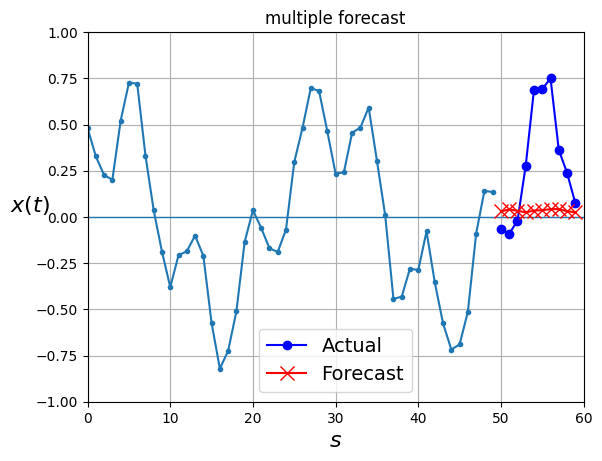

In [153]:
# multiple 예측 정의
series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, -10:, :]
Y_pred = model.predict(X_new)[..., np.newaxis]

plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.title("multiple forecast")
plt.show()

#### step 1에서 step 2~10을 예측하는 RNN

In [37]:
np.random.seed(4)

n_steps = 50
series = generate_time_series(10000, n_steps + 10)
X_train = series[:7000, :n_steps]
X_valid = series[7000:9000, :n_steps]
X_test = series[9000:, :n_steps]
Y = np.empty((10000, n_steps, 10))
for step_ahead in range(1, 10 + 1):
    Y[..., step_ahead - 1] = series[..., step_ahead:step_ahead + n_steps, 0]
Y_train = Y[:7000]
Y_valid = Y[7000:9000]
Y_test = Y[9000:]

In [38]:
X_train.shape, Y_train.shape

((7000, 50, 1), (7000, 50, 10))

In [39]:
# 개선된 모델
np.random.seed(4)
tf.random.set_seed(4)
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

In [40]:
# 마지막 스텝 출력만 mse 계산
def last_time_step_mse(Y_true, Y_pred):
    return keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])
# SimpleRNN 4 컴파일
optimizer = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss="mse", optimizer=optimizer, metrics=[last_time_step_mse])

In [41]:
# 학습 10회
# 학습
history = model.fit(X_train, Y_train, epochs=10,
                    validation_data=(X_valid, Y_valid), callbacks = tqdm_callback)

Training:   0%|           0/10 ETA: ?s,  ?epochs/s

Epoch 1/10


0/219           ETA: ?s - 

Epoch 1/10
219/219 [==============================] - 24s 104ms/step - loss: 0.0504 - last_time_step_mse: 0.0384 - val_loss: 0.0401 - val_last_time_step_mse: 0.0271
Epoch 2/10


0/219           ETA: ?s - 

Epoch 2/10
219/219 [==============================] - 20s 91ms/step - loss: 0.0356 - last_time_step_mse: 0.0213 - val_loss: 0.0347 - val_last_time_step_mse: 0.0195
Epoch 3/10


0/219           ETA: ?s - 

Epoch 3/10
219/219 [==============================] - 19s 86ms/step - loss: 0.0322 - last_time_step_mse: 0.0178 - val_loss: 0.0320 - val_last_time_step_mse: 0.0179
Epoch 4/10


0/219           ETA: ?s - 

Epoch 4/10
219/219 [==============================] - 21s 94ms/step - loss: 0.0305 - last_time_step_mse: 0.0165 - val_loss: 0.0300 - val_last_time_step_mse: 0.0165
Epoch 5/10


0/219           ETA: ?s - 

Epoch 5/10
219/219 [==============================] - 19s 88ms/step - loss: 0.0291 - last_time_step_mse: 0.0154 - val_loss: 0.0252 - val_last_time_step_mse: 0.0108
Epoch 6/10


0/219           ETA: ?s - 

Epoch 6/10
219/219 [==============================] - 19s 88ms/step - loss: 0.0239 - last_time_step_mse: 0.0106 - val_loss: 0.0216 - val_last_time_step_mse: 0.0082
Epoch 7/10


0/219           ETA: ?s - 

Epoch 7/10
219/219 [==============================] - 20s 91ms/step - loss: 0.0222 - last_time_step_mse: 0.0091 - val_loss: 0.0204 - val_last_time_step_mse: 0.0071
Epoch 8/10


0/219           ETA: ?s - 

Epoch 8/10
219/219 [==============================] - 19s 85ms/step - loss: 0.0213 - last_time_step_mse: 0.0084 - val_loss: 0.0198 - val_last_time_step_mse: 0.0068
Epoch 9/10


0/219           ETA: ?s - 

Epoch 9/10
219/219 [==============================] - 20s 90ms/step - loss: 0.0204 - last_time_step_mse: 0.0076 - val_loss: 0.0195 - val_last_time_step_mse: 0.0062
Epoch 10/10


0/219           ETA: ?s - 

Epoch 10/10
219/219 [==============================] - 19s 85ms/step - loss: 0.0193 - last_time_step_mse: 0.0067 - val_loss: 0.0195 - val_last_time_step_mse: 0.0068


In [42]:
series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, 50:, :]
Y_pred = model.predict(X_new)[:, -1][..., np.newaxis]

1/1 [==============================] - 0s 205ms/step


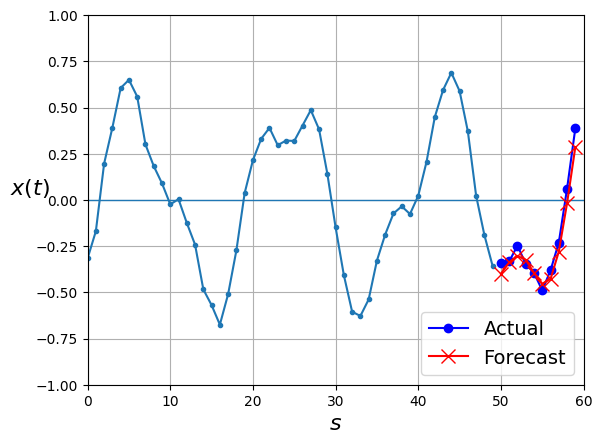

In [43]:
# 다중 예측 2
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

#### batch normalization도 사용

In [11]:
# 배치 정규화 모델
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.BatchNormalization(),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.BatchNormalization(),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

In [12]:
# 모델 컴파일
model.compile(loss="mse", optimizer=keras.optimizers.Adam(learning_rate=0.01),
              metrics=[last_time_step_mse])

In [ ]:
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid), callbacks = tqdm_callback)

In [22]:
series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, 50:, :]
Y_pred = model.predict(X_new)[:, -1][..., np.newaxis]
# 그래프 정의
def plot_series(series, y=None, y_pred=None, x_label="$s$", y_label="$x(t)$", legend=True):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bo", label="Target")
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "rx", markersize=10, label="Prediction")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])
    if legend and (y or y_pred):
        plt.legend(fontsize=14, loc="upper left")


1/1 [==============================] - 0s 25ms/step


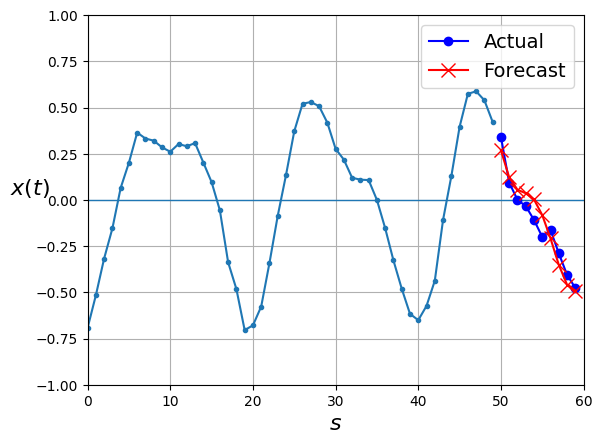

In [23]:
# 다중 예측 2
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

#### Layer Normalization 로드

In [45]:
from tensorflow.keras.layers import LayerNormalization

# 레이어 정규화 클래스
class LNSimpleRNNCell(keras.layers.Layer):
    def __init__(self, units, activation="tanh", **kwargs):
        super().__init__(**kwargs)
        self.state_size = units
        self.output_size = units
        self.simple_rnn_cell = keras.layers.SimpleRNNCell(units,
                                                          activation=None)
        self.layer_norm = LayerNormalization()  # 이곳
        self.activation = keras.activations.get(activation)
    def get_initial_state(self, inputs=None, batch_size=None, dtype=None):
        if inputs is not None:
            batch_size = tf.shape(inputs)[0]
            dtype = inputs.dtype
        return [tf.zeros([batch_size, self.state_size], dtype=dtype)]
    def call(self, inputs, states):
        outputs, new_states = self.simple_rnn_cell(inputs, states)
        norm_outputs = self.activation(self.layer_norm(outputs))
        return norm_outputs, [norm_outputs]

In [46]:
# 레이어 정규화용 모델
model = keras.models.Sequential([
    keras.layers.RNN(LNSimpleRNNCell(20), return_sequences=True,
                     input_shape=[None, 1]),
    keras.layers.RNN(LNSimpleRNNCell(20), return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

In [47]:
# 컴파일
model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])

In [48]:
# 학습 시작 20회
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid), callbacks = tqdm_callback, verbose=0)

Training:   0%|           0/20 ETA: ?s,  ?epochs/s

Epoch 1/20


0/219           ETA: ?s - 

Epoch 2/20


0/219           ETA: ?s - 

Epoch 3/20


0/219           ETA: ?s - 

Epoch 4/20


0/219           ETA: ?s - 

Epoch 5/20


0/219           ETA: ?s - 

Epoch 6/20


0/219           ETA: ?s - 

Epoch 7/20


0/219           ETA: ?s - 

Epoch 8/20


0/219           ETA: ?s - 

Epoch 9/20


0/219           ETA: ?s - 

Epoch 10/20


0/219           ETA: ?s - 

Epoch 11/20


0/219           ETA: ?s - 

Epoch 12/20


0/219           ETA: ?s - 

Epoch 13/20


0/219           ETA: ?s - 

Epoch 14/20


0/219           ETA: ?s - 

Epoch 15/20


0/219           ETA: ?s - 

Epoch 16/20


0/219           ETA: ?s - 

Epoch 17/20


0/219           ETA: ?s - 

Epoch 18/20


0/219           ETA: ?s - 

Epoch 19/20


0/219           ETA: ?s - 

Epoch 20/20


0/219           ETA: ?s - 

1/1 [==============================] - 0s 318ms/step


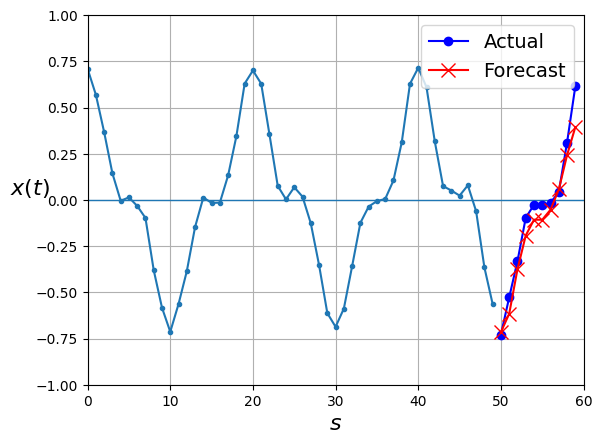

In [49]:
series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, 50:, :]
Y_pred = model.predict(X_new)[:, -1][..., np.newaxis]
# 그래프 정의
def plot_series(series, y=None, y_pred=None, x_label="$s$", y_label="$x(t)$", legend=True):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bo", label="Target")
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "rx", markersize=10, label="Prediction")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])
    if legend and (y or y_pred):
        plt.legend(fontsize=14, loc="upper left")
# 다중 예측 2
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

#### 마지막 추가  - 클래스화 한 RNN

In [50]:
# 사용자 정의 RNN
class MyRNN(keras.layers.Layer):
    def __init__(self, cell, return_sequences=False, **kwargs):
        super().__init__(**kwargs)
        self.cell = cell
        self.return_sequences = return_sequences
        self.get_initial_state = getattr(
            self.cell, "get_initial_state", self.fallback_initial_state)
    def fallback_initial_state(self, inputs):
        batch_size = tf.shape(inputs)[0]
        return [tf.zeros([batch_size, self.cell.state_size], dtype=inputs.dtype)]
    @tf.function
    def call(self, inputs):
        states = self.get_initial_state(inputs)
        shape = tf.shape(inputs)
        batch_size = shape[0]
        n_steps = shape[1]
        sequences = tf.TensorArray(
            inputs.dtype, size=(n_steps if self.return_sequences else 0))
        outputs = tf.zeros(shape=[batch_size, self.cell.output_size], dtype=inputs.dtype)
        for step in tf.range(n_steps):
            outputs, states = self.cell(inputs[:, step], states)
            if self.return_sequences:
                sequences = sequences.write(step, outputs)
        if self.return_sequences:
            return tf.transpose(sequences.stack(), [1, 0, 2])
        else:
            return outputs

In [ ]:
model = keras.models.Sequential([
    MyRNN(LNSimpleRNNCell(20), return_sequences=True,
          input_shape=[None, 1]),
    MyRNN(LNSimpleRNNCell(20), return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid), callbacks = tqdm_callback)

1/1 [==============================] - 0s 166ms/step


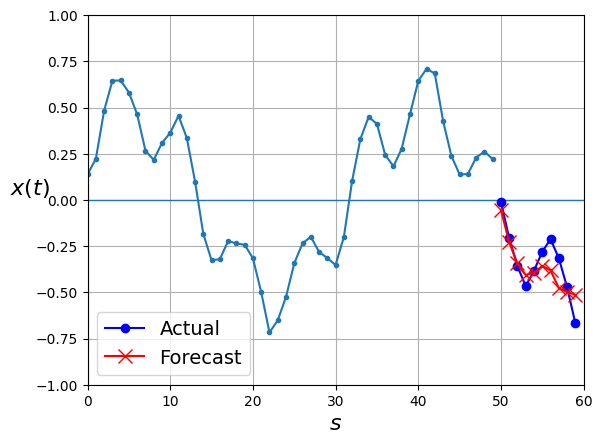

In [52]:
series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, 50:, :]
Y_pred = model.predict(X_new)[:, -1][..., np.newaxis]
# 그래프 정의
def plot_series(series, y=None, y_pred=None, x_label="$s$", y_label="$x(t)$", legend=True):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bo", label="Target")
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "rx", markersize=10, label="Prediction")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])
    if legend and (y or y_pred):
        plt.legend(fontsize=14, loc="upper left")
# 다중 예측 2
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

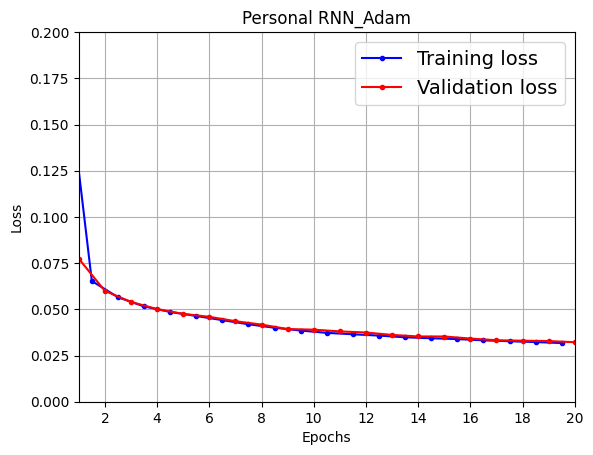

In [56]:
# 마지막 loss 시각화
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 20, 0, 0.2])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.title("Personal RNN_Adam")
plt.show()